In [1]:
import pandas as pd

# populationinSeoul.xls
# CCTVinSeoul.csv

In [2]:
CCTV_s = pd.read_csv('CCTVinSeoul.csv', encoding='cp949')
CCTV_s.head()

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,85242,5001,3758,4011,6659,8812,11569,10880,12541,11561,8614,1836.0
1,종로구,1855,21,537,120,161,134,165,166,69,254,76,152.0
2,중 구,2447,130,87,77,236,240,372,386,155,361,403,0.0
3,용산구,2611,105,234,125,221,298,351,125,307,617,228,NaN
4,성동구,3922,321,211,111,327,255,973,415,491,472,283,63.0


In [4]:
CCTV_s.rename(columns={CCTV_s.columns[0] : '구별'}, inplace=True)
CCTV_s.head()

,구별,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,85242,5001,3758,4011,6659,8812,11569,10880,12541,11561,8614,1836.0
1,종로구,1855,21,537,120,161,134,165,166,69,254,76,152.0
2,중 구,2447,130,87,77,236,240,372,386,155,361,403,0.0
3,용산구,2611,105,234,125,221,298,351,125,307,617,228,NaN
4,성동구,3922,321,211,111,327,255,973,415,491,472,283,63.0


In [5]:
pop_s = pd.read_excel('populationinSeoul.xls',
                      header = 1,
                      usecols = 'B,D,E,F,H',
                      )
pop_s.head()

,동별(2),계,한국인,등록외국인,65세이상고령자
0,소계,9725417,9494807,230610,1641813
1,종로구,153255,143624,9631,28170
2,중구,131673,122088,9585,24948
3,용산구,236632,222263,14369,39615
4,성동구,290664,283821,6843,47152


In [6]:
pop_s.rename(columns={pop_s.columns[0] : '구별',
                     pop_s.columns[1] : '인구수',
                     pop_s.columns[2] : '한국인',
                     pop_s.columns[3] : '외국인',
                     pop_s.columns[4] : '고령자',
                     }, inplace=True)
pop_s.head()

,구별,인구수,한국인,외국인,고령자
0,소계,9725417,9494807,230610,1641813
1,종로구,153255,143624,9631,28170
2,중구,131673,122088,9585,24948
3,용산구,236632,222263,14369,39615
4,성동구,290664,283821,6843,47152


In [7]:
CCTV_s.fillna(value= 0 ,inplace=True)
CCTV_s = CCTV_s[1:]

In [9]:
CCTV_s['최근증가율'] = (CCTV_s['2014년']+CCTV_s['2015년']+CCTV_s['2016년']+
                  CCTV_s['2017년']+CCTV_s['2018년']+CCTV_s['2019년']+CCTV_s['2020년']+CCTV_s['2021년']
                  ) / (CCTV_s['2013년 이전\n설치된 CCTV']+CCTV_s['2013년'])  * 100
CCTV_s.sort_values(by='최근증가율', ascending=False)

,구별,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율
6,동대문구,2631,4,14,16,115,804,814,201,218,223,219,3.0,14500.000000
9,강북구,2800,0,21,17,89,218,5,379,980,573,436,82.0,12842.857143
12,은평구,4478,17,44,332,329,555,403,635,1057,288,471,347.0,6672.131148
23,강남구,6871,136,66,580,830,1293,988,745,791,926,516,0.0,3301.485149
14,마포구,2570,55,40,112,185,480,367,368,494,300,163,6.0,2598.947368
20,동작구,2331,64,25,502,127,253,271,300,311,430,30,18.0,2498.876404
5,광진구,3214,46,85,177,95,40,666,460,712,190,739,4.0,2350.381679
16,강서구,2867,84,68,202,194,168,506,259,458,359,438,131.0,1700.000000
10,도봉구,2091,104,2,81,73,106,126,209,205,183,603,399.0,1496.226415
24,송파구,3019,98,90,84,214,143,241,541,1073,235,144,156.0,1422.872340


In [11]:
CCTV_s

,구별,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율
1,종로구,1855,21,537,120,161,134,165,166,69,254,76,152.0,205.197133
2,중 구,2447,130,87,77,236,240,372,386,155,361,403,0.0,1027.649770
3,용산구,2611,105,234,125,221,298,351,125,307,617,228,0.0,670.206490
4,성동구,3922,321,211,111,327,255,973,415,491,472,283,63.0,625.375940
5,광진구,3214,46,85,177,95,40,666,460,712,190,739,4.0,2350.381679
6,동대문구,2631,4,14,16,115,804,814,201,218,223,219,3.0,14500.000000
7,중랑구,3918,345,253,88,149,178,174,215,1059,976,471,10.0,553.511706
8,성북구,4611,137,170,229,322,594,811,867,714,253,407,107.0,1367.100977
9,강북구,2800,0,21,17,89,218,5,379,980,573,436,82.0,12842.857143
10,도봉구,2091,104,2,81,73,106,126,209,205,183,603,399.0,1496.226415


In [10]:
pop_s.head()

,구별,인구수,한국인,외국인,고령자
0,소계,9725417,9494807,230610,1641813
1,종로구,153255,143624,9631,28170
2,중구,131673,122088,9585,24948
3,용산구,236632,222263,14369,39615
4,성동구,290664,283821,6843,47152


In [12]:
pop_s.drop([0], inplace=True)
pop_s.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,153255,143624,9631,28170
2,중구,131673,122088,9585,24948
3,용산구,236632,222263,14369,39615
4,성동구,290664,283821,6843,47152
5,광진구,352796,339893,12903,53009


In [13]:
pop_s['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [18]:
CCTV_s['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [17]:
CCTV_s.loc[2,'구별'] = '중구'

In [23]:
pop_s['외국인비율'] = pop_s['외국인']/pop_s['인구수'] * 100
pop_s['고령자비율'] = pop_s['고령자']/pop_s['인구수'] * 100
pop_s.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,153255,143624,9631,28170,6.284297,18.381129
2,중구,131673,122088,9585,24948,7.279397,18.946937
3,용산구,236632,222263,14369,39615,6.072298,16.741185
4,성동구,290664,283821,6843,47152,2.354265,16.222167
5,광진구,352796,339893,12903,53009,3.657354,15.025397


In [28]:
pop_s.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,300246,296653,3593,65317,1.196685,21.754495
10,도봉구,316916,314791,2125,65693,0.670525,20.728837
2,중구,131673,122088,9585,24948,7.279397,18.946937
7,중랑구,393147,388509,4638,73465,1.179711,18.686395
12,은평구,477460,473674,3786,89141,0.792946,18.669836


In [30]:
data_result = pd.merge(CCTV_s, pop_s, on='구별')
data_result

,구별,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1855,21,537,120,161,134,165,166,69,254,76,152.0,205.197133,153255,143624,9631,28170,6.284297,18.381129
1,중구,2447,130,87,77,236,240,372,386,155,361,403,0.0,1027.649770,131673,122088,9585,24948,7.279397,18.946937
2,용산구,2611,105,234,125,221,298,351,125,307,617,228,0.0,670.206490,236632,222263,14369,39615,6.072298,16.741185
3,성동구,3922,321,211,111,327,255,973,415,491,472,283,63.0,625.375940,290664,283821,6843,47152,2.354265,16.222167
4,광진구,3214,46,85,177,95,40,666,460,712,190,739,4.0,2350.381679,352796,339893,12903,53009,3.657354,15.025397
5,동대문구,2631,4,14,16,115,804,814,201,218,223,219,3.0,14500.000000,352743,337330,15413,63427,4.369470,17.981080
6,중랑구,3918,345,253,88,149,178,174,215,1059,976,471,10.0,553.511706,393147,388509,4638,73465,1.179711,18.686395
7,성북구,4611,137,170,229,322,594,811,867,714,253,407,107.0,1367.100977,443823,433559,10264,76257,2.312634,17.181850
8,강북구,2800,0,21,17,89,218,5,379,980,573,436,82.0,12842.857143,300246,296653,3593,65317,1.196685,21.754495
9,도봉구,2091,104,2,81,73,106,126,209,205,183,603,399.0,1496.226415,316916,314791,2125,65693,0.670525,20.728837


In [31]:
data_result.columns

Index(['구별', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년', '최근증가율', '인구수',
       '한국인', '외국인', '고령자', '외국인비율', '고령자비율'],
      dtype='object')

In [34]:
del data_result['2013년 이전\n설치된 CCTV']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
del data_result['2019년']
del data_result['2020년']
del data_result['2021년']
del data_result['2022년']

data_result.head()

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1855,205.197133,153255,143624,9631,28170,6.284297,18.381129
1,중구,2447,1027.649770,131673,122088,9585,24948,7.279397,18.946937
2,용산구,2611,670.206490,236632,222263,14369,39615,6.072298,16.741185
3,성동구,3922,625.375940,290664,283821,6843,47152,2.354265,16.222167
4,광진구,3214,2350.381679,352796,339893,12903,53009,3.657354,15.025397


In [35]:
import numpy as np

np.corrcoef(data_result['고령자비율'], data_result['총계'])

array([[ 1.       , -0.3487455],
       [-0.3487455,  1.       ]])

In [36]:
np.corrcoef(data_result['외국인비율'], data_result['총계'])

array([[ 1.        , -0.22836581],
       [-0.22836581,  1.        ]])

In [37]:
np.corrcoef(data_result['인구수'], data_result['총계'])

array([[1.        , 0.45508759],
       [0.45508759, 1.        ]])

In [38]:
data_result.sort_values(by= "총계", ascending=False).head(5)

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
22,강남구,6871,3301.485149,536710,531777,4933,80335,0.919118,14.968046
20,관악구,5342,687.905605,500841,486946,13895,81247,2.774334,16.222114
7,성북구,4611,1367.100977,443823,433559,10264,76257,2.312634,17.181850
16,구로구,4608,225.194072,418709,394850,23859,74352,5.698230,17.757440
11,은평구,4478,6672.131148,477460,473674,3786,89141,0.792946,18.669836


In [39]:
data_result.sort_values(by= "인구수", ascending=False).head(5)

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
23,송파구,3019,1422.872340,668638,662961,5677,101086,0.849039,15.118195
15,강서구,2867,1700.000000,578465,573045,5420,94936,0.936962,16.411710
22,강남구,6871,3301.485149,536710,531777,4933,80335,0.919118,14.968046
10,노원구,2492,892.828685,512162,508066,4096,90053,0.799747,17.582913
20,관악구,5342,687.905605,500841,486946,13895,81247,2.774334,16.222114


In [40]:
import matplotlib.pyplot as plt

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [43]:
data_result.set_index('구별', inplace=True)

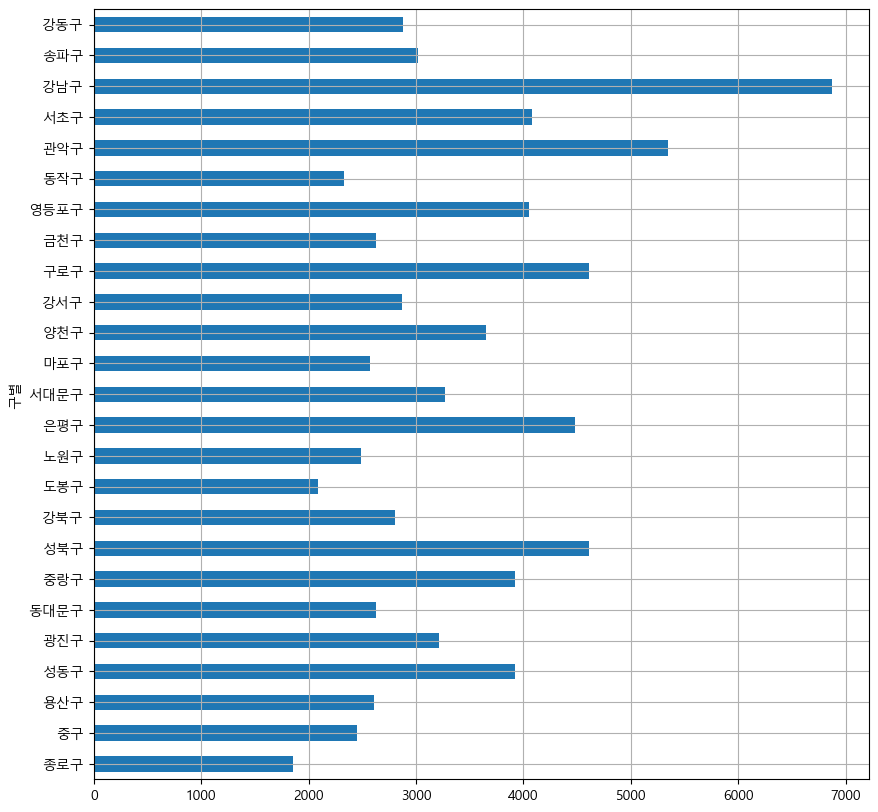

In [44]:
data_result['총계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

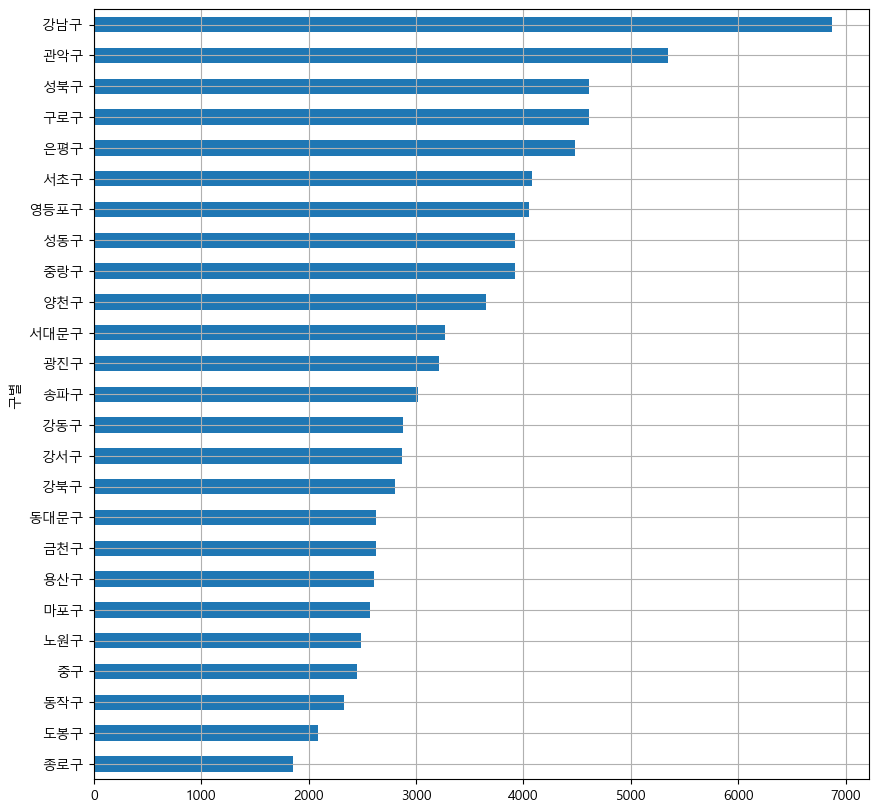

In [45]:
data_result['총계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

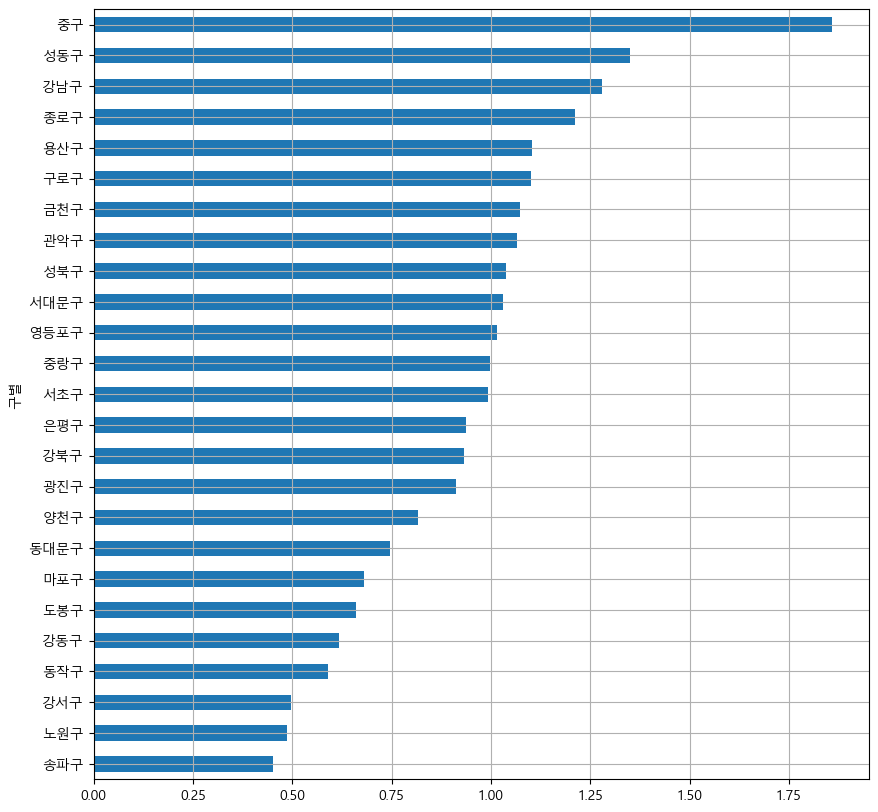

In [46]:
data_result['CCTV비율'] = data_result['총계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

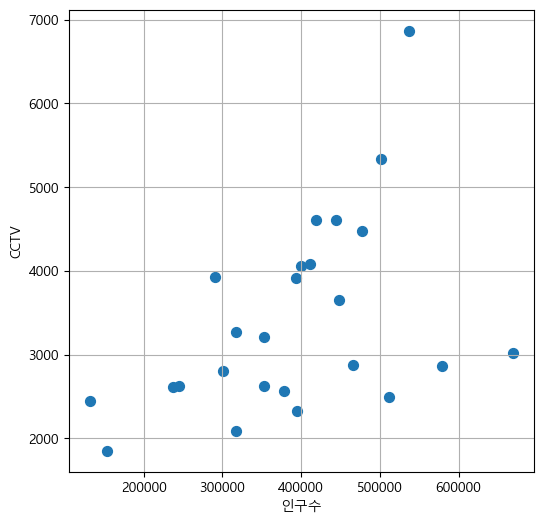

In [47]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['총계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [49]:
fp1 = np.polyfit(data_result['인구수'],data_result['총계'],1)
fp1

array([4.16706312e-03, 1.78862294e+03])

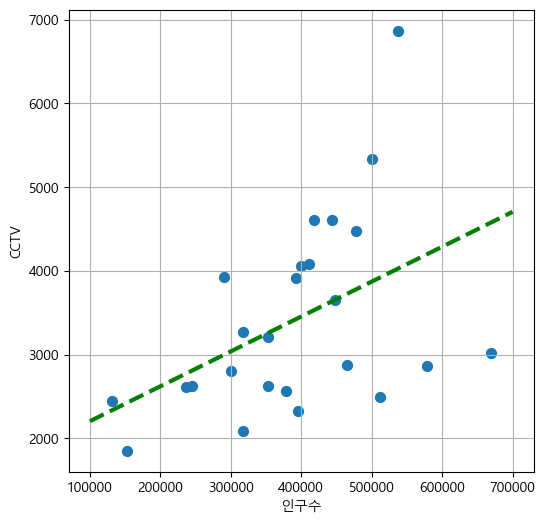

In [51]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['총계'], s=50)

plt.plot(fx, f1(fx), ls='dashed', lw = 3, color='g')

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [52]:
data_result['오차'] = np.abs(data_result['총계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,6871,3301.485149,536710,531777,4933,80335,0.919118,14.968046,1.280207,2845.872613
송파구,3019,1422.872340,668638,662961,5677,101086,0.849039,15.118195,0.451515,1555.879690
관악구,5342,687.905605,500841,486946,13895,81247,2.774334,16.222114,1.066606,1466.341000
노원구,2492,892.828685,512162,508066,4096,90053,0.799747,17.582913,0.486565,1430.834321
강서구,2867,1700.000000,578465,573045,5420,94936,0.936962,16.411710,0.495622,1332.123107


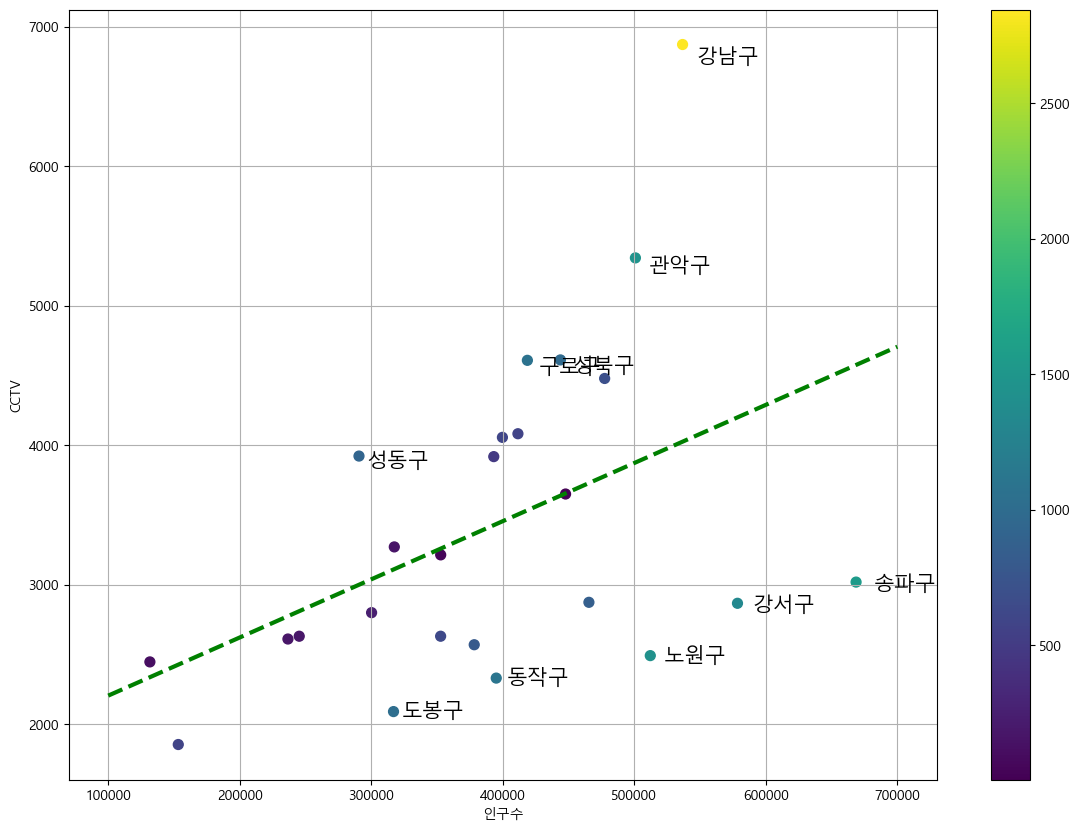

In [55]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['총계'], c=data_result['오차'], s = 50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color="g")

for n in range(10):
    plt.text(df_sort['인구수'][n]* 1.02, df_sort['총계'][n]*0.98,
            df_sort.index[n], fontsize=15)


plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.grid()
plt.show()